In [1]:
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")
from IBMQuantumExperience import IBMQuantumExperience

In [5]:
import Qconfig
api = IBMQuantumExperience.IBMQuantumExperience(Qconfig.APItoken, Qconfig.config)

In [12]:
make_bell = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[5];
creg c[5];

h q[0];
h q[1];
id q[2];
h q[3];
cx q[0],q[2];
id q[3];
id q[0];
id q[1];
x q[2];
id q[3];
id q[0];
id q[1];
h q[2];
id q[3];
id q[0];
cx q[1],q[2];
id q[3];
id q[0];
sdg q[1];
cx q[3],q[2];
id q[0];
h q[1];
h q[2];
sdg q[3];
tdg q[0];
tdg q[1];
tdg q[2];
h q[3];
cx q[0],q[1];
h q[2];
id q[3];
id q[0];
t q[1];
id q[2];
id q[3];
cx q[0],q[1];
id q[2];
id q[3];
h q[0];
id q[1];
id q[2];
id q[3];
cx q[1],q[2];
cx q[0],q[2];
cx q[3],q[2];
measure q[2] -> c[2];"""

In [13]:
out = api.run_job(qasms = [{'qasm' : make_bell}],device = 'sim',shots = 1024, max_credits=3)
print(out['status'])

RUNNING


In [14]:
import time
jobids=out['id']
results = api.get_job(jobids)
print(results['status'])
while (results['status'] == 'RUNNING'):
    time.sleep(2)
    results = api.get_job(jobids)
    print(results['status'])

RUNNING
COMPLETED


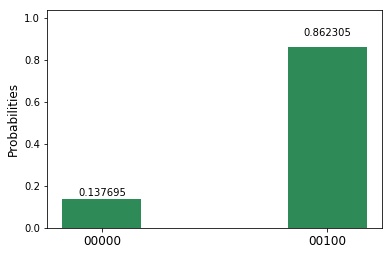

In [15]:
get_data = lambda results, i: results['qasms'][i]['result']['data']['counts']
data=get_data(results,0)
from qhelpers.basicplotter import plot_histogram
plot_histogram(data)